In [ ]:
import gensim
import gensim.downloader
from itertools import combinations
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Call word2vec
w2v_model = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
# GET the data
## Mounting path dari Google Colab
from google.colab import drive
drive.mount('/content/drive')

# path = "/content/drive/My Drive/Web Mining/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Memuat Data
import pandas as pd

dataset = pd.read_csv("/content/drive/My Drive/Web Mining/DataTopik.csv", usecols=["Question Title Clean"])

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
import nltk
import csv

In [ ]:
# preprocessing and CountVectorizer
def get_stop_words():
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    return stop_words

In [ ]:
## Pra Pengolahan - Representasi Data
from transformers import AutoTokenizer, TFAutoModel

bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFAutoModel.from_pretrained("bert-base-uncased", trainable=False)

def tokenisasi(teks):
    encode_dict = bert_tokenizer(teks,
                                   add_special_tokens = True,
                                   max_length = 128,
                                   padding = 'max_length',
                                   truncation = True,
                                   return_attention_mask = True,
                                   return_tensors = 'tf',)

    tokenID = encode_dict['input_ids']
    attention_mask = encode_dict['attention_mask']

    return tokenID, attention_mask
    return tokenID

def bert(data):
    emb = []
    for teks in data:
        #print(teks)
        token, mask = tokenisasi(str(teks))
        emb.append(bert_model([token, mask])[1].numpy().tolist()[0])

    return emb

### BERT Embedding
bert_emb = np.array(bert(dataset.to_numpy()))

print(bert_emb.shape)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


(4000, 768)


In [ ]:
## Model EFCM - Reduksi Dimensi
from sklearn.decomposition import TruncatedSVD

In [ ]:
## Model EFCM - Clustering
from sklearn.cluster import KMeans
import sys
sys.path.insert(0, "/content/drive/My Drive/Web Mining/FCMeans")
from fcmeans import fcmeans

In [ ]:
### Topic Interpretation
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#### Class Based TFIDF (C-TFIDF) Functions
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_words_per_topic(tf_idf, count, docs_per_topic, n = 10):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    top_words = []
    for i in range(len(labels)):
      top_words.append([words[j] for j in indices [i]][::-1])
    return top_words
    return top_n_words

In [ ]:
### Topic Coherence

### Fungsi Menghitung Coherence
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            if pair[0] in w2v_model:
                if pair[1] in w2v_model:
                    pair_scores.append( abs(w2v_model.similarity(pair[0], pair[1])) )
                #else:
                    #pair_scores.append(0)
            #else:
                #pair_scores.append(0)

        # get the mean for all pairs in this topic
        if pair_scores:
            topic_score = sum(pair_scores) / len(pair_scores)
            overall_coherence += topic_score

    # get the mean score across all topics
    return overall_coherence / len(term_rankings)


The number of dimensi is 1
Coherence value: 0.18475455491182702
The number of dimensi is 2
Coherence value: 0.21555526121519508
The number of dimensi is 3
Coherence value: 0.21027709433498482
The number of dimensi is 4
Coherence value: 0.20158123081653484
The number of dimensi is 5
Coherence value: 0.2069644504071524
The number of dimensi is 6
Coherence value: 0.19930442082695665
The number of dimensi is 7
Coherence value: 0.2070711434249663
The number of dimensi is 8
Coherence value: 0.19609846991693808
The number of dimensi is 9
Coherence value: 0.19609846991693808
The number of dimensi is 10
Coherence value: 0.20597153471058444
The number of dimensi is 11
Coherence value: 0.20597153471058444
The number of dimensi is 12
Coherence value: 0.2059715347105844
The number of dimensi is 13
Coherence value: 0.2059715347105844
The number of dimensi is 14
Coherence value: 0.20597153471058444
The number of dimensi is 15
Coherence value: 0.20597153471058444
The number of dimensi is 16
Coherence 

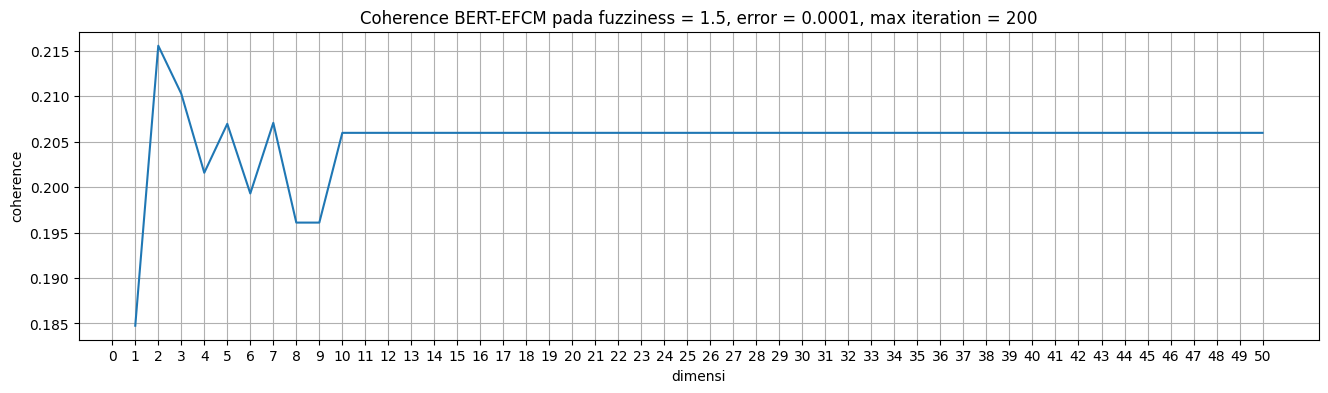

In [ ]:
import pandas as pd
import numpy as np

n_topics = 4
dimensi = [i for i in range(1, 51)]
coherences = []

for d in range(1, 51):
    dim = d

    svd = TruncatedSVD(n_components=dim)
    data = svd.fit_transform(bert_emb)
    print("The number of dimensi is", dim)

    m = 1.5
    initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
    cntr, u = fcmeans(data.T, n_topics, m, error=0.0001, maxiter=200, init=initkm.cluster_centers_.T)
    cluster_membership = np.argmax(u, axis=0)

    docs = pd.DataFrame(list(dataset["Question Title Clean"]), columns=["Doc"])
    docs['Topic'] = cluster_membership
    docs['Doc_ID'] = range(len(docs))
    docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
    top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)

    coherence = calculate_coherence(w2v_model, top_words)
    coherences.append(coherence)
    print('Coherence value:', coherence)


from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(dimensi, coherences)
plt.ylabel("coherence")
plt.xlabel("dimensi")
plt.title("Coherence BERT-EFCM pada fuzziness = 1.5, error = 0.0001, max iteration = 200")
plt.xticks(np.arange(0, 51, step=1))

plt.grid()
plt.show()

The number of fuzziness is 1.1
Coherence value: 0.21555526121519505
The number of fuzziness is 1.2
Coherence value: 0.21793712391518055
The number of fuzziness is 1.3
Coherence value: 0.21686802518864473
The number of fuzziness is 1.4
Coherence value: 0.20126628673945862
The number of fuzziness is 1.5
Coherence value: 0.2069644504071524
The number of fuzziness is 1.6
Coherence value: 0.19930442082695665
The number of fuzziness is 1.7
Coherence value: 0.20597153471058444
The number of fuzziness is 1.8
Coherence value: 0.2059715347105844
The number of fuzziness is 1.9
Coherence value: 0.21395178120583297


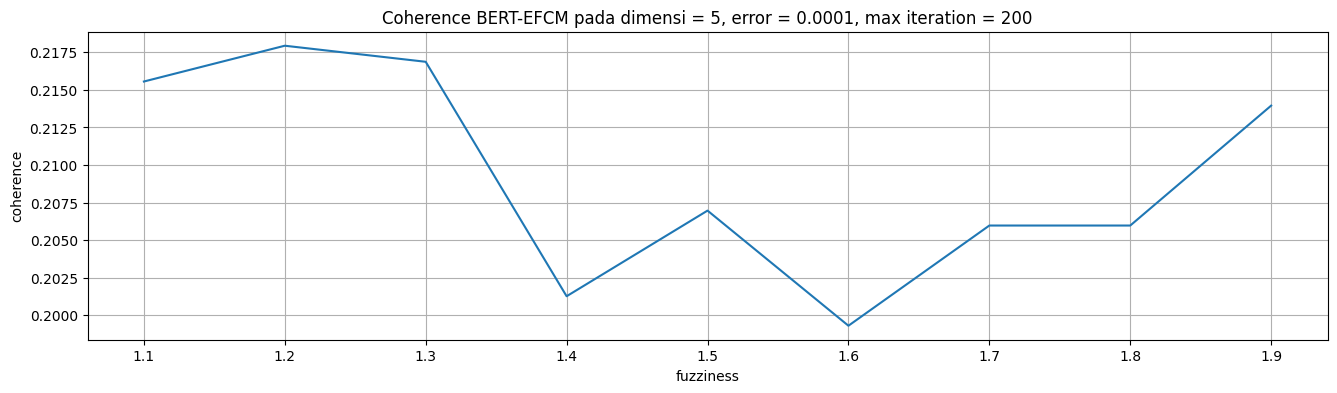

In [ ]:
import pandas as pd
import numpy as np

n_topics = 4
dim = 5
fuzzy = [float(i) for i in range(11, 20)]
fuzziness = [x / 10 for x in fuzzy]
coherences = []

for f in fuzziness:
    m = f

    svd = TruncatedSVD(n_components=dim)
    data = svd.fit_transform(bert_emb)
    print("The number of fuzziness is", m)

    initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
    cntr, u = fcmeans(data.T, n_topics, m, error=0.0001, maxiter=200, init=initkm.cluster_centers_.T)
    cluster_membership = np.argmax(u, axis=0)

    docs = pd.DataFrame(list(dataset["Question Title Clean"]), columns=["Doc"])
    docs['Topic'] = cluster_membership
    docs['Doc_ID'] = range(len(docs))
    docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
    top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)

    coherence = calculate_coherence(w2v_model, top_words)
    coherences.append(coherence)
    print('Coherence value:', coherence)

from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(fuzziness, coherences)
plt.ylabel("coherence")
plt.xlabel("fuzziness")
plt.title("Coherence BERT-EFCM pada dimensi = 5, error = 0.0001, max iteration = 200")
plt.grid()
plt.show()

The number of error is 0.001
Coherence value: 0.19930442082695665
The number of error is 0.002
Coherence value: 0.2069644504071524
The number of error is 0.003
Coherence value: 0.2069644504071524
The number of error is 0.004
Coherence value: 0.2069644504071524
The number of error is 0.005
Coherence value: 0.2069644504071524
The number of error is 0.006
Coherence value: 0.2069644504071524
The number of error is 0.007
Coherence value: 0.19930442082695662
The number of error is 0.008
Coherence value: 0.19930442082695665
The number of error is 0.009
Coherence value: 0.2069644504071524
The number of error is 0.01
Coherence value: 0.19930442082695665
The number of error is 0.011
Coherence value: 0.2069644504071524
The number of error is 0.012
Coherence value: 0.2069644504071524
The number of error is 0.013
Coherence value: 0.2069644504071524
The number of error is 0.014
Coherence value: 0.2069644504071524
The number of error is 0.015
Coherence value: 0.2069644504071524
The number of error is

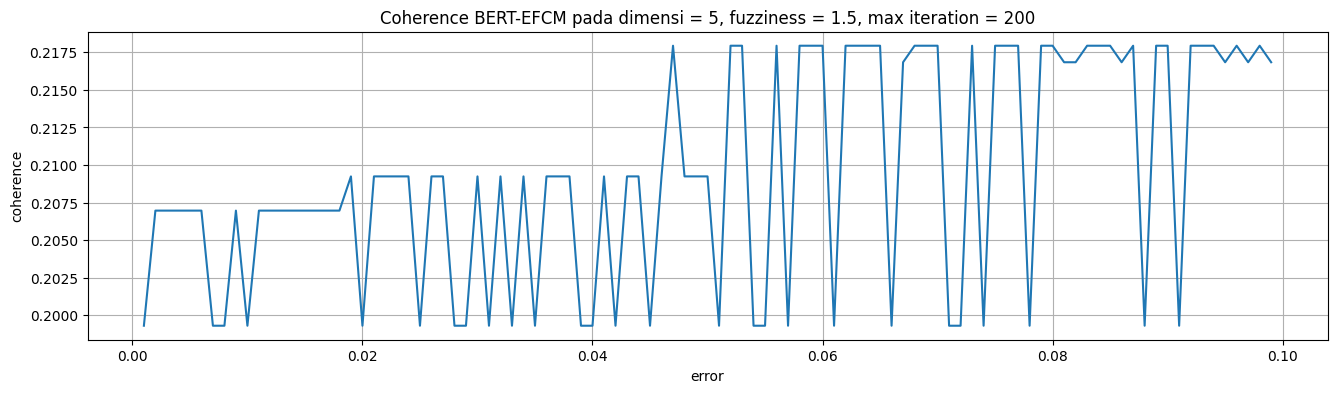

In [ ]:
import pandas as pd
import numpy as np

n_topics = 4
dim = 5
error = [float(i) for i in range(1, 100)]
error = [x / 1000 for x in error]
coherences = []

for err in error:
    e = err

    svd = TruncatedSVD(n_components=dim)
    data = svd.fit_transform(bert_emb)
    print("The number of error is", e)

    m = 1.52
    initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
    cntr, u = fcmeans(data.T, n_topics, m, error=e, maxiter=200, init=initkm.cluster_centers_.T)
    cluster_membership = np.argmax(u, axis=0)

    docs = pd.DataFrame(list(dataset["Question Title Clean"]), columns=["Doc"])
    docs['Topic'] = cluster_membership
    docs['Doc_ID'] = range(len(docs))
    docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
    top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)

    coherence = calculate_coherence(w2v_model, top_words)
    coherences.append(coherence)
    print('Coherence value:', coherence)

from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(error, coherences)
plt.ylabel("coherence")
plt.xlabel("error")
plt.title("Coherence BERT-EFCM pada dimensi = 5, fuzziness = 1.5, max iteration = 200")
plt.grid()
plt.show()

The number of max iteration is 150
Coherence value: 0.2069644504071524
The number of max iteration is 151
Coherence value: 0.2069644504071524
The number of max iteration is 152
Coherence value: 0.2069644504071524
The number of max iteration is 153
Coherence value: 0.2069644504071524
The number of max iteration is 154
Coherence value: 0.2069644504071524
The number of max iteration is 155
Coherence value: 0.2069644504071524
The number of max iteration is 156
Coherence value: 0.2069644504071524
The number of max iteration is 157
Coherence value: 0.2069644504071524
The number of max iteration is 158
Coherence value: 0.2069644504071524
The number of max iteration is 159
Coherence value: 0.2069644504071524
The number of max iteration is 160
Coherence value: 0.2069644504071524
The number of max iteration is 161
Coherence value: 0.2069644504071524
The number of max iteration is 162
Coherence value: 0.2069644504071524
The number of max iteration is 163
Coherence value: 0.2069644504071524
The nu

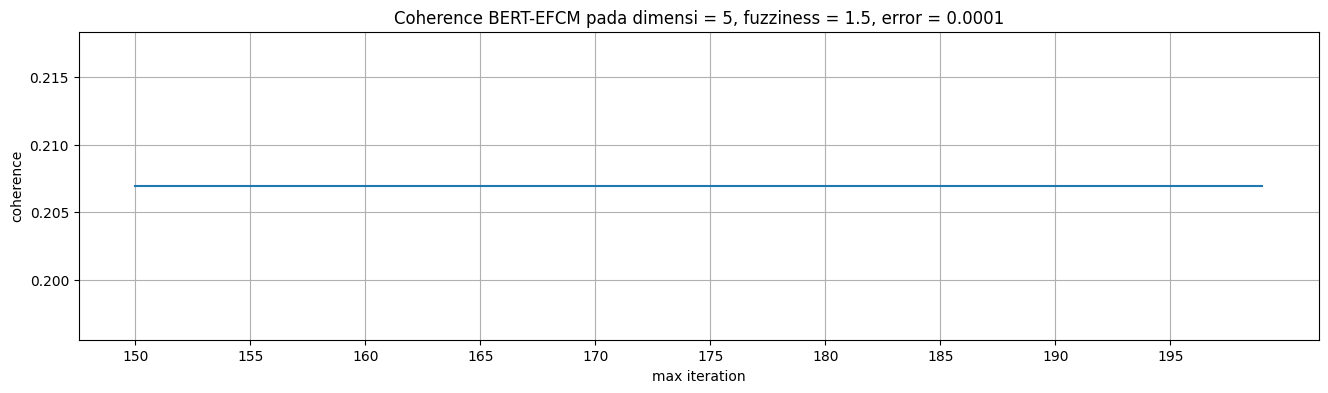

In [ ]:
import pandas as pd
import numpy as np

n_topics = 4
dim = 5
max_iter = [i for i in range(150, 200)]
coherences = []

for max in max_iter:
    maxi = max

    svd = TruncatedSVD(n_components=dim)
    data = svd.fit_transform(bert_emb)
    print("The number of max iteration is", maxi)

    m = 1.52
    initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
    cntr, u = fcmeans(data.T, n_topics, m, error=0.0001, maxiter=maxi, init=initkm.cluster_centers_.T)
    cluster_membership = np.argmax(u, axis=0)

    docs = pd.DataFrame(list(dataset["Question Title Clean"]), columns=["Doc"])
    docs['Topic'] = cluster_membership
    docs['Doc_ID'] = range(len(docs))
    docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
    top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)

    coherence = calculate_coherence(w2v_model, top_words)
    coherences.append(coherence)
    print('Coherence value:', coherence)


from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(max_iter, coherences)
plt.ylabel("coherence")
plt.xlabel("max iteration")
plt.title("Coherence BERT-EFCM pada dimensi = 5, fuzziness = 1.5, error = 0.0001")
plt.xticks(np.arange(150, 200, step=5))

plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

n_topics = 4
dim = 2
max_iter = 200
coherences = []


svd = TruncatedSVD(n_components=dim)
data = svd.fit_transform(bert_emb)

m = 1.2
initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
cntr, u = fcmeans(data.T, n_topics, m, error=0.006, maxiter=maxi, init=initkm.cluster_centers_.T)
cluster_membership = np.argmax(u, axis=0)

docs = pd.DataFrame(list(dataset["Question Title Clean"]), columns=["Doc"])
docs['Topic'] = cluster_membership
docs['Doc_ID'] = range(len(docs))
docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)

coherence = calculate_coherence(w2v_model, top_words)
coherences.append(coherence)
print('Coherence value:', coherence)

Coherence value: 0.21555526121519508


In [ ]:
coh = []
for j in range(4):
    herence = []
    for i in range(10):
        herence.append(top_words[j][i])
    coh.append(herence)

In [ ]:
print(coh)

[['does', 'did', 'best', 'like', 'day', 'think', 'favorite', 'people', 'good', 'yahoo'], ['does', 'song', 'best', 'computer', 'riddle', 'mean', 'know', 'good', 'answer', 'like'], ['does', 'people', 'like', 'know', 'need', 'want', 'best', 'windows', 'think', 'free'], ['does', 'best', 'yahoo', 'help', 'free', 'way', 'know', 'people', 'music', 'need']]


In [ ]:
import pandas as pd
pd.DataFrame(coh).T

,0,1,2,3
0,does,does,does,does
1,did,song,people,best
2,best,best,like,yahoo
3,like,computer,know,help
4,day,riddle,need,free
5,think,mean,want,way
6,favorite,know,best,know
7,people,good,windows,people
8,good,answer,think,music
9,yahoo,like,free,need
